# Balanceando dados para o nosso modelo de MAchine Learning


In [1]:
# Importando os pacotes a serem utilizados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split

# Biblioteca para calcular a acuracia do modelo
from sklearn.metrics import accuracy_score

# Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Carregando os dados
# O arquivo online_shoppers_intention.csv estarei disponibilizando junto com o arquivo do jupyter notebook.
df_original = pd.read_csv('https://raw.githubusercontent.com/op1154/Vendas/main/vendas_online.csv')
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Análise Exploratória

# Shape dos dados
df_original.shape

# Tipos de Dados
df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [4]:
# Verificando valores missing
print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [5]:
# Removendo as linhas com valores missing
df_original.dropna(inplace = True)

# Verificando valores missing
print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [6]:
# Shape
df_original.shape

(12316, 18)

In [7]:
# Agrupando os valore para visualizar a quantidade de dados como True e False
df_original.groupby('Revenue').size()

Revenue
False    10408
True      1908
dtype: int64

In [8]:
df_original_revenue = df_original[['Revenue']]

df_original_revenue

,Revenue
0,False
1,False
2,False
3,False
4,False
...,...
12325,False
12326,False
12327,False
12328,False


In [9]:
# Visualizar os tipos de variaveis
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType              12

In [10]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

# Remove valores missing eventualmente gerados
df_original.dropna(inplace = True)

In [11]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [12]:
df_original.groupby('Revenue').size()

Revenue
False    10408
True      1908
dtype: int64

In [13]:
VAR_PREDITORAS_ORIG = df_original.drop('Revenue', axis = 1)

In [15]:
VAR_TARGET = df_original['Revenue']

In [16]:
# Separando os dados em TREINO e TESTE (VARIAVEIS ORIGINAIS)
# 70% PARA TREINO E 30% PARA TESTE
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_ORIG, VAR_TARGET, test_size = 0.3, random_state = 10)

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)

In [55]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [56]:
resultados = knn.predict(X_test)

In [57]:
score = accuracy_score(Y_test, resultados)

In [58]:
score

0.8603518267929635

# Balanceamento de Classe - Oversampling

In [24]:
# Importa a função
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Separa X e y
X = df_original.iloc[:, 0:17]
y = df_original.iloc[:, 17]

# Cria o balanceador SMOTE
smote_bal = SMOTE()

# Aplica o balanceador
x_bal, y_bal = smote_bal.fit_resample(X, y)

In [25]:
y_bal

0        False
1        False
2        False
3        False
4        False
         ...  
20811     True
20812     True
20813     True
20814     True
20815     True
Name: Revenue, Length: 20816, dtype: bool

In [26]:
# Transformando para DataFrame e nomeando as colunas
df_padronizado = pd.DataFrame(y_bal)
df_padronizado.columns = ['Revenda']

In [27]:
df_padronizado.groupby('Revenda').size()

Revenda
False    10408
True     10408
dtype: int64

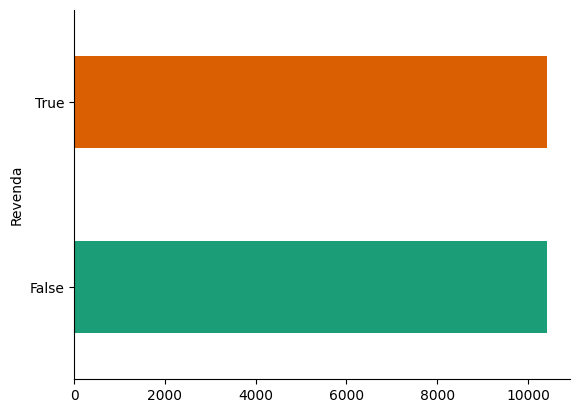

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
df_padronizado.groupby('Revenda').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
# Separando os dados em TREINO e TESTE (VARIAVEIS BALANCEADAS)
# 70% PARA TREINO E 30% PARA TESTE
X_treina, X_testa, Y_treina, Y_testa = train_test_split(x_bal, y_bal, test_size = 0.3, random_state = 10)

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)

In [31]:
knn.fit(X_treina, Y_treina)

KNeighborsClassifier()

In [32]:
resultados = knn.predict(X_testa)

In [33]:
scoreBALANCEADA = accuracy_score(Y_testa, resultados)

In [52]:
scoreBALANCEADA

0.8485188150520416

# KFOLD

In [35]:
from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=10,shuffle=True, random_state=7)

knn = KNeighborsClassifier(n_neighbors=5)

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=crossvalidation, scoring='accuracy')
print("Array do kfold com os resultados: ",scores)

Array do kfold com os resultados:  [0.86525974 0.87337662 0.87094156 0.8400974  0.86444805 0.84821429
 0.85783916 0.87896019 0.86677498 0.85540211]


In [37]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Revenue, Length: 12316, dtype: bool

In [60]:
print("Acuracia média com kfold: ",scores.mean())

Acuracia média com kfold:  0.8621314104254804


In [64]:
print("Acuracia média dados desbalanceados : ",score)

Acuracia média dados desbalanceados :  0.8603518267929635


In [65]:
print("Acuracia média dados desbalanceados : ",scoreBALANCEADA)

Acuracia média dados desbalanceados :  0.8485188150520416
